In [1]:
import sys

In [2]:
%run ../utils/configuration.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           7043 non-null   object
 1   Count                 7043 non-null   int64 
 2   Gender                7043 non-null   object
 3   Age                   7043 non-null   int64 
 4   Under 30              7043 non-null   object
 5   Senior Citizen        7043 non-null   object
 6   Married               7043 non-null   object
 7   Dependents            7043 non-null   object
 8   Number of Dependents  7043 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 495.3+ KB
Customer ID
True    7043
Name: count, dtype: int64
Series([], Name: Customer ID, dtype: object)


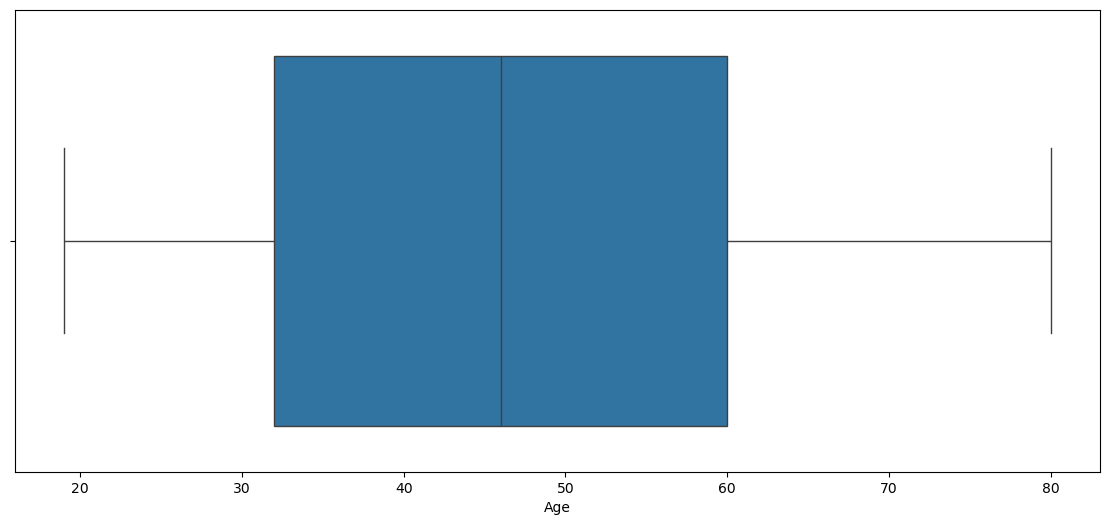

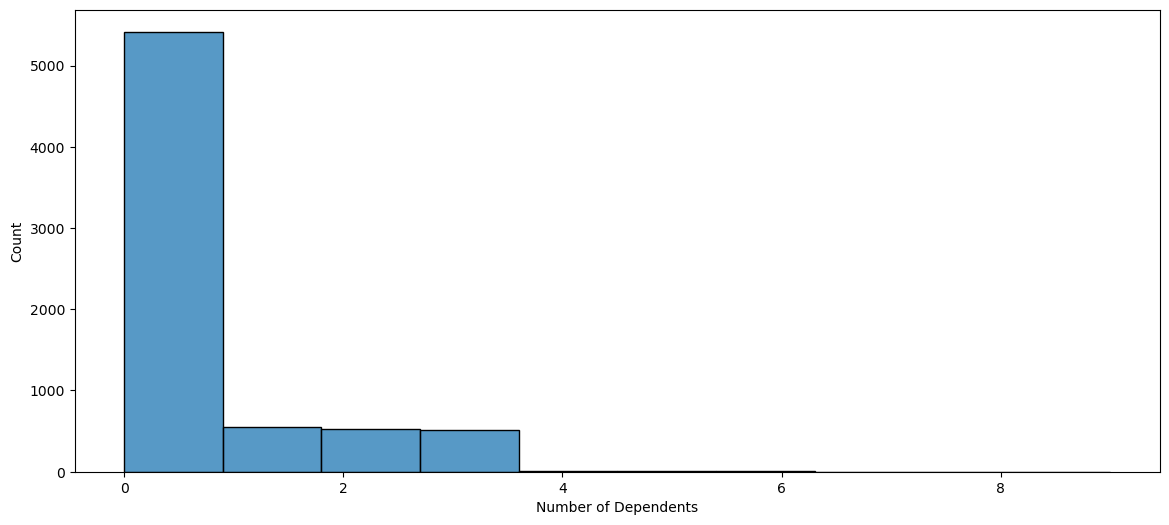

C:\Users\Danie\AppData\Local\Temp\ipykernel_4564\110818452.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Under 30']= df['Under 30'].astype(str).str.upper().replace({'NO': 0,'YES': 1}).astype(int)


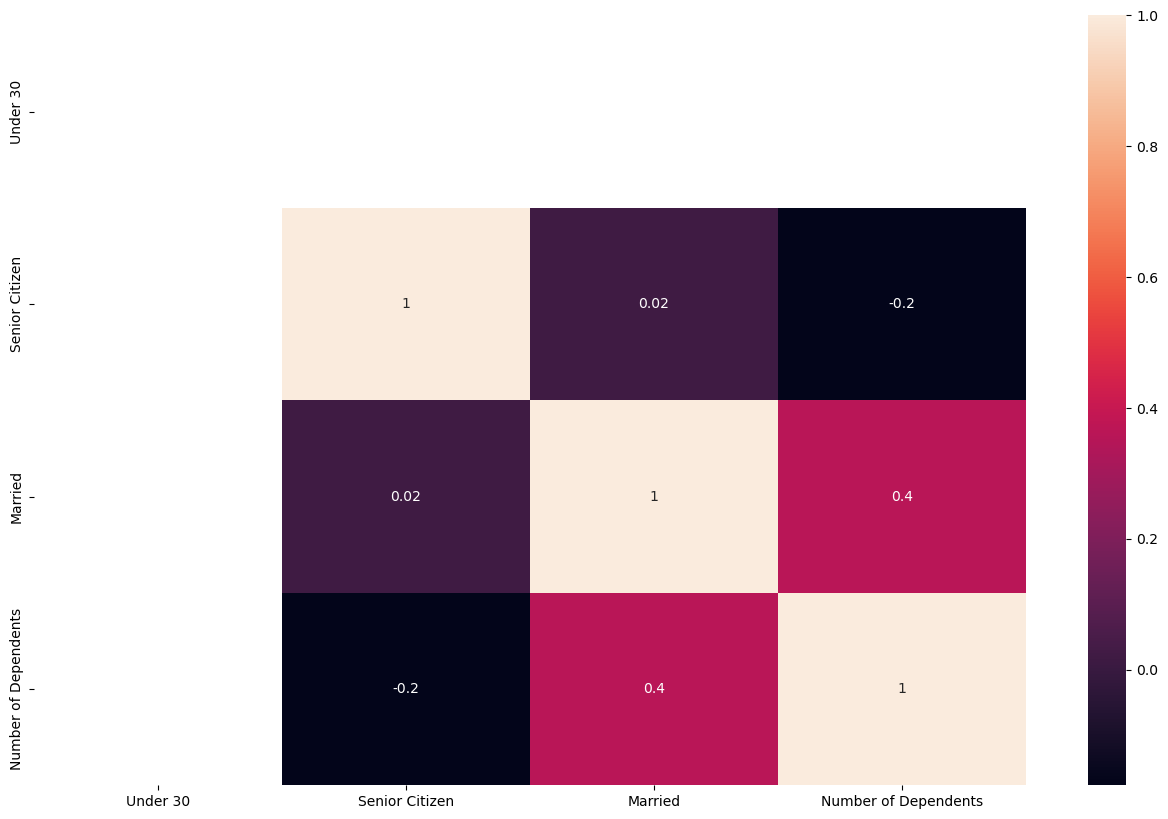

In [3]:
%run 0101_Demographics.ipynb

In [4]:
%run 0102_Location.ipynb


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


shape: (3, 9)
┌────────────┬───────┬────────────┬────────────┬───┬──────────┬────────────┬───────────┬───────────┐
│ Customer   ┆ Count ┆ Country    ┆ State      ┆ … ┆ Zip Code ┆ Lat Long   ┆ Latitude  ┆ Longitude │
│ ID         ┆ ---   ┆ ---        ┆ ---        ┆   ┆ ---      ┆ ---        ┆ ---       ┆ ---       │
│ ---        ┆ i64   ┆ str        ┆ str        ┆   ┆ i64      ┆ str        ┆ f64       ┆ f64       │
│ str        ┆       ┆            ┆            ┆   ┆          ┆            ┆           ┆           │
╞════════════╪═══════╪════════════╪════════════╪═══╪══════════╪════════════╪═══════════╪═══════════╡
│ 8779-QRDMV ┆ 1     ┆ United     ┆ California ┆ … ┆ 90022    ┆ 34.02381,  ┆ 34.02381  ┆ -118.1565 │
│            ┆       ┆ States     ┆            ┆   ┆          ┆ -118.15658 ┆           ┆ 82        │
│            ┆       ┆            ┆            ┆   ┆          ┆ 2          ┆           ┆           │
│ 7495-OOKFY ┆ 1     ┆ United     ┆ California ┆ … ┆ 90063    ┆ 34.044271, ┆ 

In [5]:
%run 0103_population.ipynb

["'ID'", "'Zip Code'", "'Population'"]


In [6]:
%run 0104_services.ipynb

In [7]:
%run 0105_status_file.ipynb

In [8]:
import polars as pl

In [9]:
try:
    df_demographic = pl.read_parquet(f'{silver_path}/demographics.parquet')
    df_location = pl.read_parquet(f'{silver_path}/location.parquet')
    df_population = pl.read_parquet(f'{silver_path}/population.parquet')
    df_services = pl.read_parquet(f'{silver_path}/service.parquet')
    df_status = pl.read_parquet(f'{silver_path}/status.parquet')
except Exception as e:
    print(f"Error: {e}")
    sys.exit(1)


In [10]:
df_demographic

customer_id,gender,age,under_30,senior_citizen,married,number_of_dependents
str,str,i64,f64,i64,i64,i64
"""8779-QRDMV""","""Male""",78,null,1,0,0
"""7495-OOKFY""","""Female""",74,null,1,1,1
"""1658-BYGOY""","""Male""",71,null,1,0,3
"""4598-XLKNJ""","""Female""",78,null,1,1,1
"""4846-WHAFZ""","""Female""",80,null,1,1,1
…,…,…,…,…,…,…
"""2569-WGERO""","""Female""",30,null,0,0,0
"""6840-RESVB""","""Male""",38,null,0,1,2
"""2234-XADUH""","""Female""",30,null,0,1,2


In [11]:
df_location

customer_id,city,zip_code,lat_long,latitude,longitude
str,str,i64,str,f64,f64
"""8779-QRDMV""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582
"""7495-OOKFY""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237
"""1658-BYGOY""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715
"""4598-XLKNJ""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639
"""4846-WHAFZ""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188
…,…,…,…,…,…
"""2569-WGERO""","""Landers""",92285,"""34.341737, -116.539416""",34.341737,-116.539416
"""6840-RESVB""","""Adelanto""",92301,"""34.667815, -117.536183""",34.667815,-117.536183
"""2234-XADUH""","""Amboy""",92304,"""34.559882, -115.637164""",34.559882,-115.637164


In [12]:
df_population

id,zip_code,population
i64,i64,i64
1,90001,54492
2,90002,44586
3,90003,58198
4,90004,67852
5,90005,43019
…,…,…
1667,96145,4002
1668,96146,942
1669,96148,678


In [13]:
df_services

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64
"""8779-QRDMV""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65
"""7495-OOKFY""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1
"""1658-BYGOY""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88
"""4598-XLKNJ""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07
"""4846-WHAFZ""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2569-WGERO""","""No""",0,72,"""None""","""Yes""",22.77,"""No""","""No""","""None""",0,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Two Year""","""Yes""","""Bank Withdrawal""",21.15,1419.4,19.31,0,1639.44,3039.53
"""6840-RESVB""","""Yes""",1,24,"""Offer C""","""Yes""",36.05,"""Yes""","""Yes""","""Cable""",24,"""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""One Year""","""Yes""","""Mailed Check""",84.8,1990.5,48.23,0,865.2,2807.47
"""2234-XADUH""","""Yes""",4,72,"""None""","""Yes""",29.66,"""Yes""","""Yes""","""Fiber Optic""",59,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""One Year""","""Yes""","""Credit Card""",103.2,7362.9,45.38,0,2135.52,9453.04


In [14]:
df_status

customer_id,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason
str,i64,str,i64,str,str,i64,i64,i64,str,str
"""8779-QRDMV""",1,"""Q3""",3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data"""
"""7495-OOKFY""",1,"""Q3""",3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer"""
"""1658-BYGOY""",1,"""Q3""",2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer"""
"""4598-XLKNJ""",1,"""Q3""",2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services"""
"""4846-WHAFZ""",1,"""Q3""",2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges"""
…,…,…,…,…,…,…,…,…,…,…
"""2569-WGERO""",1,"""Q3""",5,"""Stayed""","""No""",0,45,5306,"""NO_LABEL""","""NO_LABEL"""
"""6840-RESVB""",1,"""Q3""",3,"""Stayed""","""No""",0,59,2140,"""NO_LABEL""","""NO_LABEL"""
"""2234-XADUH""",1,"""Q3""",4,"""Stayed""","""No""",0,71,5560,"""NO_LABEL""","""NO_LABEL"""


In [15]:
df_population = df_population.select([pl.col('zip_code'), pl.col('population')])

In [16]:
df_merge = df_services.join(df_demographic, on="customer_id", how="left")\
                        .join(df_location, on="customer_id", how="left")\
                        .join(df_status, on="customer_id", how="left")\
                        .join(df_population, on="zip_code", how="left")

In [17]:
df_merge

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,str,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64
"""8779-QRDMV""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65,"""Male""",78,null,1,0,0,"""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,1,"""Q3""",3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data""",68701
"""7495-OOKFY""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1,"""Female""",74,null,1,1,1,"""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,1,"""Q3""",3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer""",55668
"""1658-BYGOY""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88,"""Male""",71,null,1,0,3,"""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,1,"""Q3""",2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer""",47534
"""4598-XLKNJ""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07,"""Female""",78,null,1,1,1,"""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,1,"""Q3""",2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services""",27778
"""4846-WHAFZ""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36,"""Female""",80,null,1,1,1,"""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188,1,"""Q3""",2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges""",26265
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2569-WGERO""","""No""",0,72,"""None""","""Yes""",22.77,"""No""","""No""","""None""",0,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Two Year""","""Yes""","""Bank Withdrawal""",21.15,1419.4,19.31,0,1639.44,3039.53,"""Female""",30,null,0,0,0,"""Landers""",92285,"""34.341737, -116.539416""",34.341737,-116.539416,1,"""Q3""",5,"""Stayed""","""No""",0,45,5306,"""NO_LABEL""","""NO_LABEL""",2182
"""6840-RESVB""","""Yes""",1,24,"""Offer C""","""Yes""",36.05,"""Yes""","""Yes""","""Cable""",24,"""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""One Year""","""Yes""","""Mailed Check""",84.8,1990.5,48.23,0,865.2,2807.47,"""Mal

In [18]:
df_train = df_merge.sample(
    fraction=0.8,
    with_replacement=False,
    shuffle=True
)

df_test = df_merge.join(df_train, on="customer_id", how="anti")

In [19]:
df_train

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,str,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64
"""4450-YOOHP""","""No""",0,39,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",6,"""No""","""No""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",50.65,1905.4,3.51,0,0.0,1901.89,"""Female""",56,null,0,0,0,"""Sacramento""",95818,"""38.556306, -121.495817""",38.556306,-121.495817,1,"""Q3""",4,"""Stayed""","""No""",0,31,5433,"""NO_LABEL""","""NO_LABEL""",21313
"""3585-ISXZP""","""No""",0,8,"""None""","""Yes""",29.66,"""Yes""","""Yes""","""Fiber Optic""",12,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""No""","""Bank Withdrawal""",95.65,778.1,0.0,0,237.28,1015.38,"""Female""",53,null,0,0,0,"""Indio""",92201,"""33.713891, -116.237257""",33.713891,-116.237257,1,"""Q3""",3,"""Churned""","""Yes""",1,95,5335,"""Attitude""","""Attitude of support person""",56307
"""7601-DHFWZ""","""No""",0,48,"""Offer B""","""Yes""",30.82,"""Yes""","""No""","""None""",0,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Two Year""","""No""","""Credit Card""",24.0,1183.05,0.0,0,1479.36,2662.41,"""Female""",54,null,0,0,0,"""Simi Valley""",93063,"""34.296813, -118.685703""",34.296813,-118.685703,1,"""Q3""",3,"""Stayed""","""No""",0,66,3948,"""NO_LABEL""","""NO_LABEL""",49027
"""1205-WNWPJ""","""No""",0,7,"""Offer E""","""Yes""",2.24,"""No""","""Yes""","""DSL""",22,"""No""","""No""","""No""","""Yes""","""Yes""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",59.5,415.95,0.0,0,15.68,431.63,"""Female""",54,null,0,0,0,"""Lakehead""",96051,"""40.883853, -122.418258""",40.883853,-122.418258,1,"""Q3""",3,"""Churned""","""Yes""",1,91,4661,"""Other""","""Moved""",1236
"""3635-JBPSG""","""No""",0,15,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",23,"""No""","""Yes""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Two Year""","""Yes""","""Credit Card""",38.8,603.0,0.0,0,0.0,603.0,"""Female""",49,null,0,0,0,"""Van Nuys""",91406,"""34.195685, -118.490752""",34.195685,-118.490752,1,"""Q3""",4,"""Stayed""","""No""",0,55,2118,"""NO_LABEL""","""NO_LABEL""",50047
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""3629-WEAAM""","""No""",0,8,"""None""","""Yes""",45.04,"""No""","""Yes""","""DSL""",73,"""No""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Month-to-Month""","""No""","""Mailed Check""",64.1,504.05,0.0,10,360.32,874.37,"""Female""",19,null,0,0,0,"""Forbestown""",95941,"""39.531028, -121.24807""",39.531028,-121.24807,1,"""Q3""",5,"""Stayed""","""No""",0,25,2804,"""NO_LABEL""","""NO_LABEL""",452
"""3801-HMYNL""","""Yes""",1,1,"""None""","""Yes""",32.35,"""No""","""Yes""","""Fiber Optic""",18,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""No""","""Mailed Check""",89.15,89.15,0.0,0,32.35,121.5,"""Male""",44,null,0,1,0,"""Brooks""",95606,"""38.809804, -122.241383""",38.809804,-122.241383,1,"""Q3""",1,"""Churned""","""Yes""",1,68,3123,"""Competitor""","""Compet

In [20]:
df_test

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,str,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64
"""2656-FMOKZ""","""No""",0,15,"""Offer D""","""Yes""",44.07,"""Yes""","""Yes""","""Fiber Optic""",19,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Mailed Check""",74.45,1145.7,0.0,0,661.05,1806.75,"""Female""",70,null,1,0,2,"""Pasadena""",91106,"""34.139402, -118.128658""",34.139402,-118.128658,1,"""Q3""",2,"""Churned""","""Yes""",1,91,5717,"""Dissatisfaction""","""Limited range of services""",23742
"""7273-TEFQD""","""No""",0,3,"""Offer E""","""No""",0.0,"""No""","""Yes""","""DSL""",28,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",41.15,132.2,0.0,0,0.0,132.2,"""Male""",67,null,1,0,0,"""La Puente""",91746,"""34.038983, -117.991372""",34.038983,-117.991372,1,"""Q3""",2,"""Churned""","""Yes""",1,96,2314,"""Price""","""Long distance charges""",30802
"""4385-GZQXV""","""No""",0,16,"""Offer D""","""Yes""",9.43,"""No""","""Yes""","""Fiber Optic""",9,"""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",94.45,1511.2,0.0,0,150.88,1662.08,"""Female""",68,null,1,0,0,"""Ontario""",91764,"""34.074087, -117.605618""",34.074087,-117.605618,1,"""Q3""",1,"""Churned""","""Yes""",1,81,3810,"""Competitor""","""Competitor had better devices""",49474
"""7534-BFESC""","""No""",0,24,"""Offer C""","""Yes""",30.87,"""Yes""","""Yes""","""Fiber Optic""",15,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.1,1712.7,0.0,0,740.88,2453.58,"""Male""",69,null,1,0,0,"""San Diego""",92122,"""32.85723, -117.209754""",32.85723,-117.209774,1,"""Q3""",2,"""Churned""","""Yes""",1,91,2018,"""Competitor""","""Competitor made better offer""",34902
"""2840-XANRC""","""Yes""",1,24,"""Offer C""","""Yes""",16.1,"""No""","""Yes""","""Cable""",12,"""No""","""No""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",93.15,2231.05,0.0,0,386.4,2617.45,"""Male""",77,null,1,1,0,"""San Diego""",92122,"""32.85723, -117.209760""",32.85723,-117.209774,1,"""Q3""",2,"""Churned""","""Yes""",1,73,2212,"""Competitor""","""Competitor made better offer""",34902
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""0550-DCXLH""","""No""",0,13,"""None""","""Yes""",40.99,"""No""","""Yes""","""DSL""",21,"""No""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""No""","""Mailed Check""",73.35,931.55,49.02,0,532.87,1415.4,"""Male""",64,null,0,0,0,"""Thermal""",92274,"""33.53604, -116.119222""",33.53604,-116.119222,1,"""Q3""",4,"""Stayed""","""No""",0,65,4645,"""NO_LABEL""","""NO_LABEL""",17018
"""9281-CEDRU""","""Yes""",2,68,"""None""","""Yes""",8.62,"""No""","""Yes""","""DSL""",53,"""No""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""Yes""","""Two Year""","""No""","""Bank Withdrawal""",64.1,4326.25,19.12,0,586.16,4893.29,"""Female""",23,null,

In [21]:
df_train.write_parquet(train_path)

In [22]:
df_test.write_parquet(test_path)

In [23]:
df_train.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']